In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cvxpy as cp

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [149]:
features = pd.read_parquet('../data/features.parquet')
target = pd.read_parquet('../data/target.parquet')
model = tf.keras.models.load_model('../data/model')

In [150]:
dataset = pd.concat([features, target], axis=1)

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

test_features = test_dataset.iloc[:, :-1]

In [151]:
y_hat = np.ravel(model.predict(test_features))

1600/1600 [==============================] - 1s 656us/step


In [152]:
Y = y_hat[:10]
Y

array([-0.43283874,  0.48970807,  0.83019984,  0.40261364,  0.29658794,
        0.15195572,  0.09818959,  0.04367673, -0.00445998,  0.09431076],
      dtype=float32)

In [153]:
n = len(Y)
w = cp.Variable(n)

In [154]:
B = np.identity(n)
B[0,0] = np.pi
B[:, -1] = 42
B

array([[ 3.14159265,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 42.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 42.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 42.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 42.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        , 42.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        , 42.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        

In [155]:
obj = cp.Maximize(w @ Y)

constraints = [
    cp.sum(w) == 1,
    cp.norm(w, 1) <= 100,
    cp.norm(w, "inf") <= 0.2,
    cp.norm(B @ w) <= 5.0,
]

prob = cp.Problem(obj, constraints)

In [156]:
prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Jan 14 01:58:33 PM: Your problem has 10 variables, 4 constraints, and 0 parameters.
(CVXPY) Jan 14 01:58:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 14 01:58:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 14 01:58:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 14 01:58:33 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jan 14 01:58:33 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Cone

0.5518617971007259

In [157]:
w.value

array([-0.2       ,  0.2       ,  0.2       ,  0.2       ,  0.2       ,
        0.2       ,  0.2       ,  0.16413979, -0.2       ,  0.03586021])

In [161]:
np.savetxt("../data/omega.csv", w.value, delimiter=",")

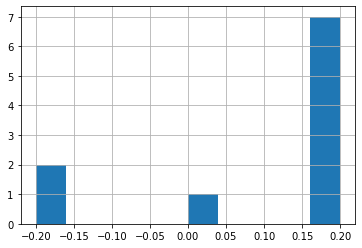

In [162]:
plt.hist(w.value, bins=n)
plt.grid()
plt.savefig('../data/omega.png')